In [1]:
import numpy as np

In [85]:
class PLA:
    def __init__(self, n_iter, learning_rate):
        """
        params:
        n_iter: number of loop
        learning_rate: learning rate
        
        """
        
        self.n_iter = n_iter
        self.activation_func = self._unit_step_func
        self.lr = learning_rate
        self.weight = None
        self.bias = None
        
    def fit(self, X, y):
        n_sample, n_features = X.shape
        
        self.weight = np.zeros(n_features)
        self.bias = 0
        
        for _ in range(self.n_iter):
            for idx, _ in enumerate(X):
                linear_output = np.dot(X[idx], self.weight) + self.bias
                y_predict = self.activation_func(linear_output)
                updates  = self.lr*(y[idx] - y_predict)
                self.weight += updates*X[idx]
                self.bias += self.lr*(y[idx] - y_predict)
            
        
        
    def predict(self, X):
        linear_output = np.dot(X, self.weight) + self.bias
        y_predict = self.activation_func(linear_output)
        return y_predict
        
        
    def _unit_step_func(self, x):
        return np.where(x>= 0,1,0)
    

In [3]:
from sklearn.datasets import make_classification

In [4]:
X, y = make_classification(n_samples=1000, n_features=10, n_informative=10, n_redundant=0, random_state=1)

In [88]:
pla = PLA(100, 0.001)

In [89]:
pla.fit(X,y)

In [90]:
pla.predict(X)

array([1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1])

In [68]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets

Perceptron classification accuracy 1.0


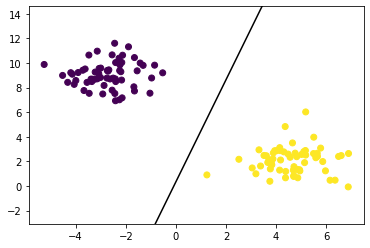

In [92]:
def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy

X, y = datasets.make_blobs(
    n_samples=150, n_features=2, centers=2, cluster_std=1.05, random_state=42
)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=123
)

p = PLA(learning_rate=0.0005, n_iter=1000)
p.fit(X_train, y_train)
predictions = p.predict(X_test)



print("Perceptron classification accuracy", accuracy(y_test, predictions))

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.scatter(X_train[:, 0], X_train[:, 1], marker="o", c=y_train)

x0_1 = np.amin(X_train[:, 0])
x0_2 = np.amax(X_train[:, 0])

x1_1 = (-p.weight[0] * x0_1 - p.bias) / p.weight[1]
x1_2 = (-p.weight[0] * x0_2 - p.bias) / p.weight[1]

ax.plot([x0_1, x0_2], [x1_1, x1_2], "k")

ymin = np.amin(X_train[:, 1])
ymax = np.amax(X_train[:, 1])
ax.set_ylim([ymin - 3, ymax + 3])

plt.show()